In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns # data visualization library 
import matplotlib.pyplot as plt
df_train = pd.read_csv(r'C:\Users\user\Desktop\比賽\比賽8\train.csv')

In [20]:
y = df_train.open_flag                      
list = ['country_code','grass_date','user_id',"row_id",'open_flag',"last_open_day","last_login_day","last_checkout_day"]
x = df_train.drop(list,axis = 1 )
x.head()

,subject_line_length,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days
0,44,0,2,4,12,43,99,0,5,10
1,44,2,9,17,18,48,90,1,1,4
2,49,0,4,12,24,69,119,5,19,27
3,49,0,0,1,9,23,69,1,3,6
4,49,0,0,0,2,5,5,0,0,0


未打開郵件的人有:  62083
打開郵件的人有 :  11456
全體打開郵件的機率為 :  0.1557812861202899
Never open的人打開郵件的機率為 :  0.061585528065975
Never login的人打開郵件的機率為 :  0.26523297491039427
Never checkout的人打開郵件的機率為 :  0.1380656610470275


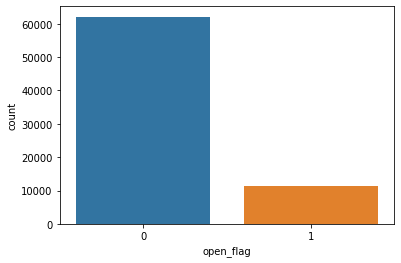

In [80]:
"""
可以看到會打開廣告郵件的只有15.5%的人
1.last_open_day,last_login_day,last_checkout_day這三個變數因為其裡面包含從未open/login/checkout的選項,因此先分群觀察此變數是否是影響
  打開郵件與否的關鍵變數
2.可以看到,從未打開過其他email的使用者,打開蝦皮廣告email的機率小於一般使用者
  可以看到,從未登入蝦皮帳戶的使用者,打開蝦皮廣告email的機率大於一般使用者,可能表示此為潛在客戶之重要因子
3.last_checkout_day表示未曾在蝦皮蝦費的人對於蝦皮的廣告較不感興趣
"""
ax = sns.countplot(y,label="1")       
B, M = y.value_counts()
print('未打開郵件的人有: ',B)
print('打開郵件的人有 : ',M)
print("全體打開郵件的機率為 : ",df_train["open_flag"].mean())
print("Never open的人打開郵件的機率為 : ",df_train.groupby("last_open_day").get_group("Never open")["open_flag"].mean())
print("Never login的人打開郵件的機率為 : ",df_train.groupby("last_login_day").get_group("Never login")["open_flag"].mean())
print("Never checkout的人打開郵件的機率為 : ",df_train.groupby("last_checkout_day").get_group("Never checkout")["open_flag"].mean())

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

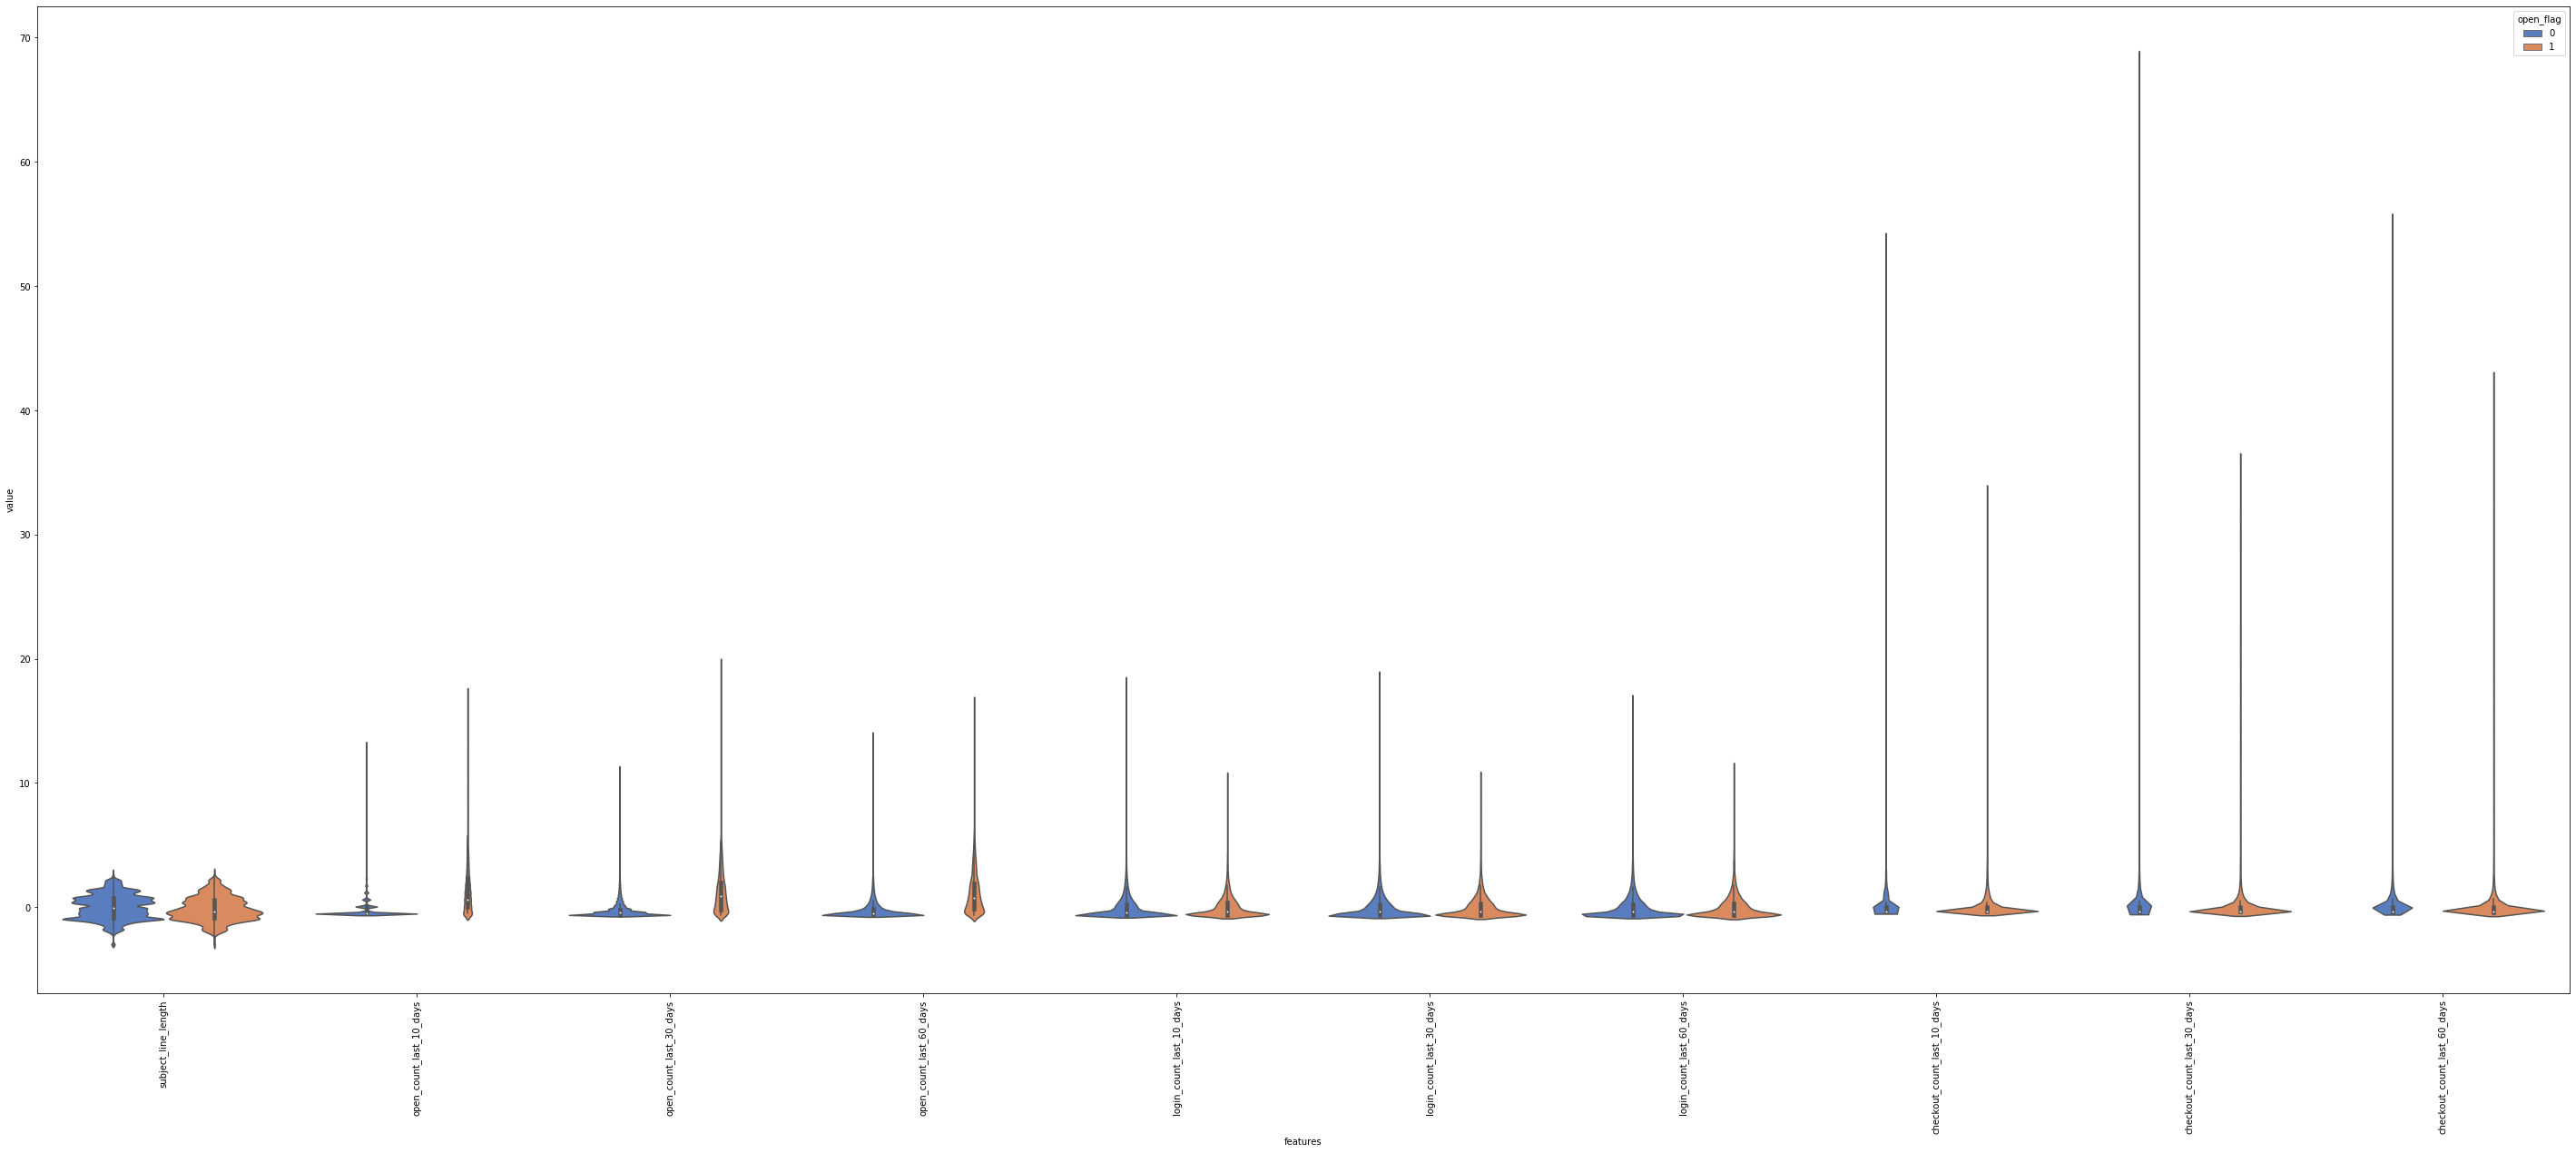

In [75]:
"""
可看到open_count_last_[10/30/60]_days這個變數在此兩群分布差異最大,可以看到點開愈多其他email的的使用者,其點開蝦皮廣告email的機率也愈高

"""
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              
data = pd.concat([y,data_n_2.iloc[:,0:11]],axis=1)
data = pd.melt(data,id_vars="open_flag",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(50,20))
sns.violinplot(x="features", y="value", hue="open_flag", data=data,split=False, palette="muted",scale="area")
plt.xticks(rotation=90)

In [76]:
df_area = pd.get_dummies(df_train['country_code'])
df = pd.concat( [df_area, df_train], axis=1 )
df = df.drop('row_id',axis = 1)
df = df.drop('country_code',axis = 1)
print(df.columns)
df_train = df
print(df_train)

Index([                            1,                             2,
                                   3,                             4,
                                   5,                             6,
                                   7,                  'grass_date',
                           'user_id',         'subject_line_length',
                     'last_open_day',              'last_login_day',
                 'last_checkout_day',     'open_count_last_10_days',
           'open_count_last_30_days',     'open_count_last_60_days',
          'login_count_last_10_days',    'login_count_last_30_days',
          'login_count_last_60_days', 'checkout_count_last_10_days',
       'checkout_count_last_30_days', 'checkout_count_last_60_days',
                         'open_flag'],
      dtype='object')
       1  2  3  4  5  6  7                 grass_date  user_id  \
0      0  0  0  1  0  0  0  2019-07-16 00:00:00+08:00       43   
1      0  0  0  1  0  0  0  2019-07-16 00:00:00+

In [77]:
"""
樣本平衡
在此案例中,由於打開郵件的樣本僅佔15%,機器只要全猜"不打開"即可有85%準確率,機器會傾向負向本判斷
因此我們採用簡單的樣本生成,將正負平衡至約莫50%的狀態
"""
df_sample_balance = df_train
for i in range(4):
    df_sample_balance = df_sample_balance.append(df.groupby("open_flag").get_group(1))
df_sample_balance.shape

(119363, 23)

In [81]:
"""
上述last_open_day,last_login_day,last_checkout_day是重要的變數,因此將其裡面從未open/login/checkout者以常識值填入
"""
x = df_sample_balance.drop('user_id',axis = 1)
x = x.drop('grass_date',axis = 1)
x = x.drop('open_flag',axis = 1)

X=[]
for i in x.values:
    if i[8] == 'Never open':
         i[8] = 500
    if i[9] == 'Never login':
         i[9] = 500
    if i[10] == 'Never checkout':
         i[10] = 500
    X.append(i)  
Y = df_sample_balance['open_flag']



In [85]:
import numpy as np
X = np.array(X)
Y = np.array(Y)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.01,random_state = 1)

In [84]:
from sklearn import preprocessing
preprocessing.scale(X_train)
preprocessing.scale(y_train)

array([-0.96022964, -0.96022964,  1.04141755, ..., -0.96022964,
        1.04141755,  1.04141755])

In [519]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# from xgboost import XGBClassifier

# model = RandomForestClassifier(n_estimators = 200 ,random_state = 100)
# model.fit(X_train,y_train)

# result = model.predict(X_test)

# print(model.score(X_train,y_train))
# print(model.score(X_test,y_test))



In [86]:
"""
用來fit的模型參數,XGB
"""

import xgboost as xgb
from sklearn.metrics import r2_score, auc
model_xgb = xgb.XGBClassifier(
  # base_score=0.5,
  # #  colsample_bylevel=1,
  # #   colsample_bytree=1,
  #      gamma=0.1,
  #       learning_rate=0.06,
  #        max_delta_step=1,
  #         max_depth=7,
  #      min_child_weight=1,
  #       missing=None,
  #        n_estimators=90, 
  #        nthread=-1,
  #      objective='binary:logistic',
  #       reg_alpha=0,
  #        reg_lambda=1,
  #      scale_pos_weight=1,
  #       seed=3,
  #       silent=True, 
  #       # subsample=1
)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict_proba(X_test)

print(model_xgb.score(X_test, y_test))

0.8400335008375209


In [ ]:
y = df_train.open_flag                      
list = ['country_code','grass_date','user_id',"row_id",'open_flag',"last_open_day","last_login_day","last_checkout_day"]
x = df_train.drop(list,axis = 1 )
x.head()
ax = sns.countplot(y,label="1")       
B, M = y.value_counts()

In [ ]:
"""
可看到open_count_last_[10/30/60]_days這個變數在此兩群分布差異最大,可以看到點開愈多其他email的的使用者,其點開蝦皮廣告email的機率也愈高

"""
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              
data = pd.concat([y,data_n_2.iloc[:,0:11]],axis=1)
data = pd.melt(data,id_vars="open_flag",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(50,20))
sns.violinplot(x="features", y="value", hue="open_flag", data=data,split=False, palette="muted",scale="area")
plt.xticks(rotation=90)

# 填答 

In [135]:
# 填答
df_test = pd.read_csv(r"C:\Users\user\Desktop\比賽\比賽8\test.csv")

df_area = pd.get_dummies(df_test['country_code'])
df = pd.concat( [df_area, df_test], axis=1 )
df = df.drop('row_id',axis = 1)
df = df.drop('country_code',axis = 1)
print(df.columns)
df_test = df
print(df_test)

df_test = df_test.drop('user_id',axis = 1)
df_test = df_test.drop('grass_date',axis = 1)
df_test.shape

Index([                            1,                             2,
                                   3,                             4,
                                   5,                             6,
                                   7,                  'grass_date',
                           'user_id',         'subject_line_length',
                     'last_open_day',              'last_login_day',
                 'last_checkout_day',     'open_count_last_10_days',
           'open_count_last_30_days',     'open_count_last_60_days',
          'login_count_last_10_days',    'login_count_last_30_days',
          'login_count_last_60_days', 'checkout_count_last_10_days',
       'checkout_count_last_30_days', 'checkout_count_last_60_days'],
      dtype='object')
       1  2  3  4  5  6  7                 grass_date  user_id  \
0      0  0  0  0  0  1  0  2019-09-03 00:00:00+08:00        0   
1      0  0  0  0  0  1  0  2019-09-03 00:00:00+08:00      130   
2      0  0  0  0  1

(55970, 20)

In [136]:

X=[]
for i in df_test.values:
    if i[8] == 'Never open':
         i[8] = 500
    if i[9] == 'Never login':
         i[9] = 500
    if i[10] == 'Never checkout':
         i[10] = 500
    X.append(i)  

In [137]:
preprocessing.scale(X)

array([[-0.64186699, -0.47572017, -0.58726749, ..., -0.32127367,
         0.33920804,  0.84772069],
       [-0.64186699, -0.47572017, -0.58726749, ..., -0.32127367,
        -0.39273383, -0.4168937 ],
       [-0.64186699, -0.47572017, -0.58726749, ...,  0.25004511,
        -0.1487532 , -0.27638099],
       ...,
       [-0.64186699, -0.47572017, -0.58726749, ..., -0.32127367,
        -0.39273383, -0.4168937 ],
       [-0.64186699, -0.47572017, -0.58726749, ..., -0.32127367,
        -0.39273383, -0.4168937 ],
       [-0.64186699, -0.47572017, -0.58726749, ..., -0.32127367,
        -0.39273383, -0.4168937 ]])

In [138]:
X = np.array(X).astype(float)

In [139]:
X = np.array(X).astype(float)
y_pred = model_xgb.predict_proba(X)
y_pred_num = model_xgb.predict(X)

In [140]:
df_test1 = pd.read_csv(r"C:\Users\user\Desktop\比賽\比賽8\test.csv")
# df_test1 = df_test1.drop([col for col in df_test1.columns if col!='row_id'],axis=1)
df_test1['open_flag'] = y_pred_num

# 觀察初次填答之答案分布

未打開郵件的人有:  43932
打開郵件的人有 :  12038
全體打開郵件的機率為 :  0.21507950687868502


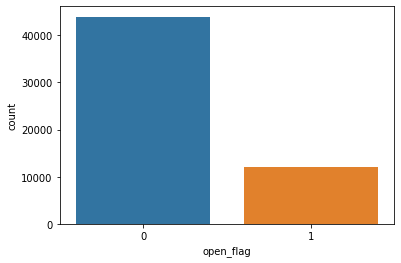

In [142]:
"""
全體打開郵件的機率為 :  0.21%高於母體樣本之15%,原因是剛剛做樣本平衡時複增加了為正的樣本,破壞原本之比例分配
"""
y = df_test1.open_flag                      
list = ['country_code','grass_date','user_id',"row_id",'open_flag',"last_open_day","last_login_day","last_checkout_day"]
x = df_test1.drop(list,axis = 1 )
x.head()
ax = sns.countplot(y,label="1")       
B, M = y.value_counts()

print('未打開郵件的人有: ',B)
print('打開郵件的人有 : ',M)
print("全體打開郵件的機率為 : ",df_test1["open_flag"].mean())

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

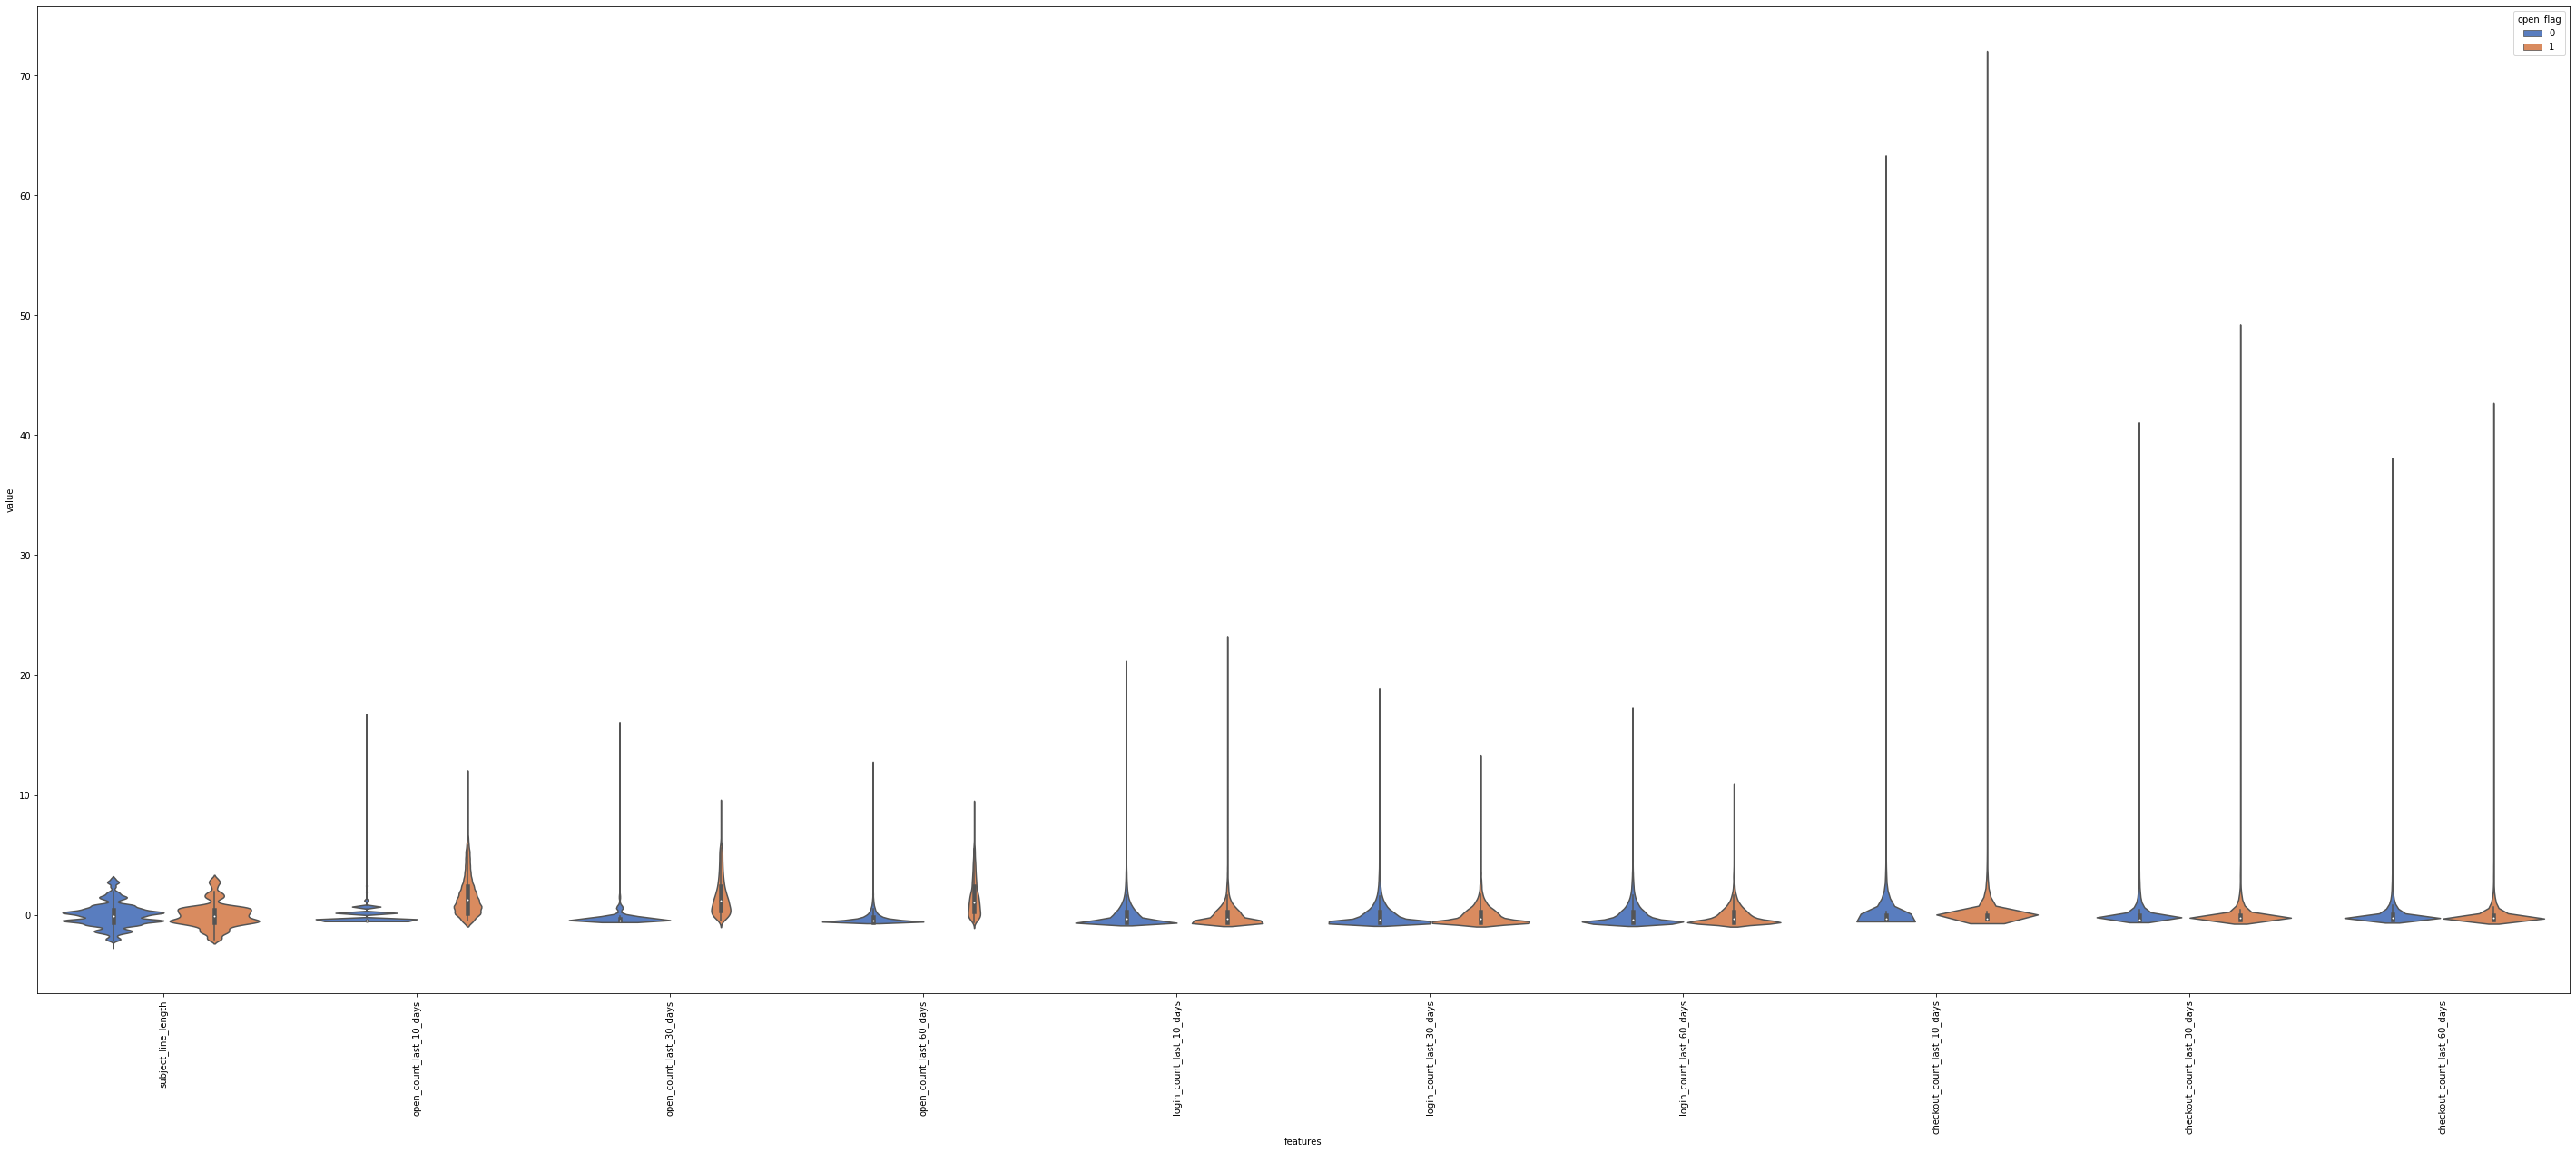

In [147]:
"""
可看到open_count_last_[10/30/60]_days這些變數與母體之分部也較不相同(較為短胖)
"""
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              
data = pd.concat([y,data_n_2.iloc[:,0:11]],axis=1)
data = pd.melt(data,id_vars="open_flag",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(50,20))
sns.violinplot(x="features", y="value", hue="open_flag", data=data,split=False, palette="muted",scale="area")
plt.xticks(rotation=90)

# 二次填答

In [148]:
"""
透過調整其二分機率之臨界值,使其打開郵件與否的機率符合母體樣態
"""
調整_test = [1 if  i[1] >= 0.630 else 0 for i in y_pred]
調整_test.count(1)
df_test1 = pd.read_csv(r"C:\Users\user\Desktop\比賽\比賽8\test.csv")
# df_test1 = df_test1.drop([col for col in df_test1.columns if col!='row_id'],axis=1)
df_test1['open_flag'] = 調整_test

未打開郵件的人有:  47190
打開郵件的人有 :  8780
全體打開郵件的機率為 :  0.15686975165267109


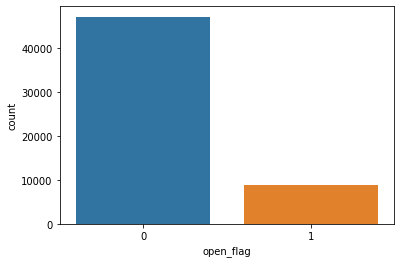

In [149]:
"""
可以看到全體打開郵件的機率為 :  15% 較為接近母體之分布
"""
y = df_test1.open_flag                      
list = ['country_code','grass_date','user_id',"row_id",'open_flag',"last_open_day","last_login_day","last_checkout_day"]
x = df_test1.drop(list,axis = 1 )
x.head()
ax = sns.countplot(y,label="1")       
B, M = y.value_counts()

print('未打開郵件的人有: ',B)
print('打開郵件的人有 : ',M)
print("全體打開郵件的機率為 : ",df_test1["open_flag"].mean())

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

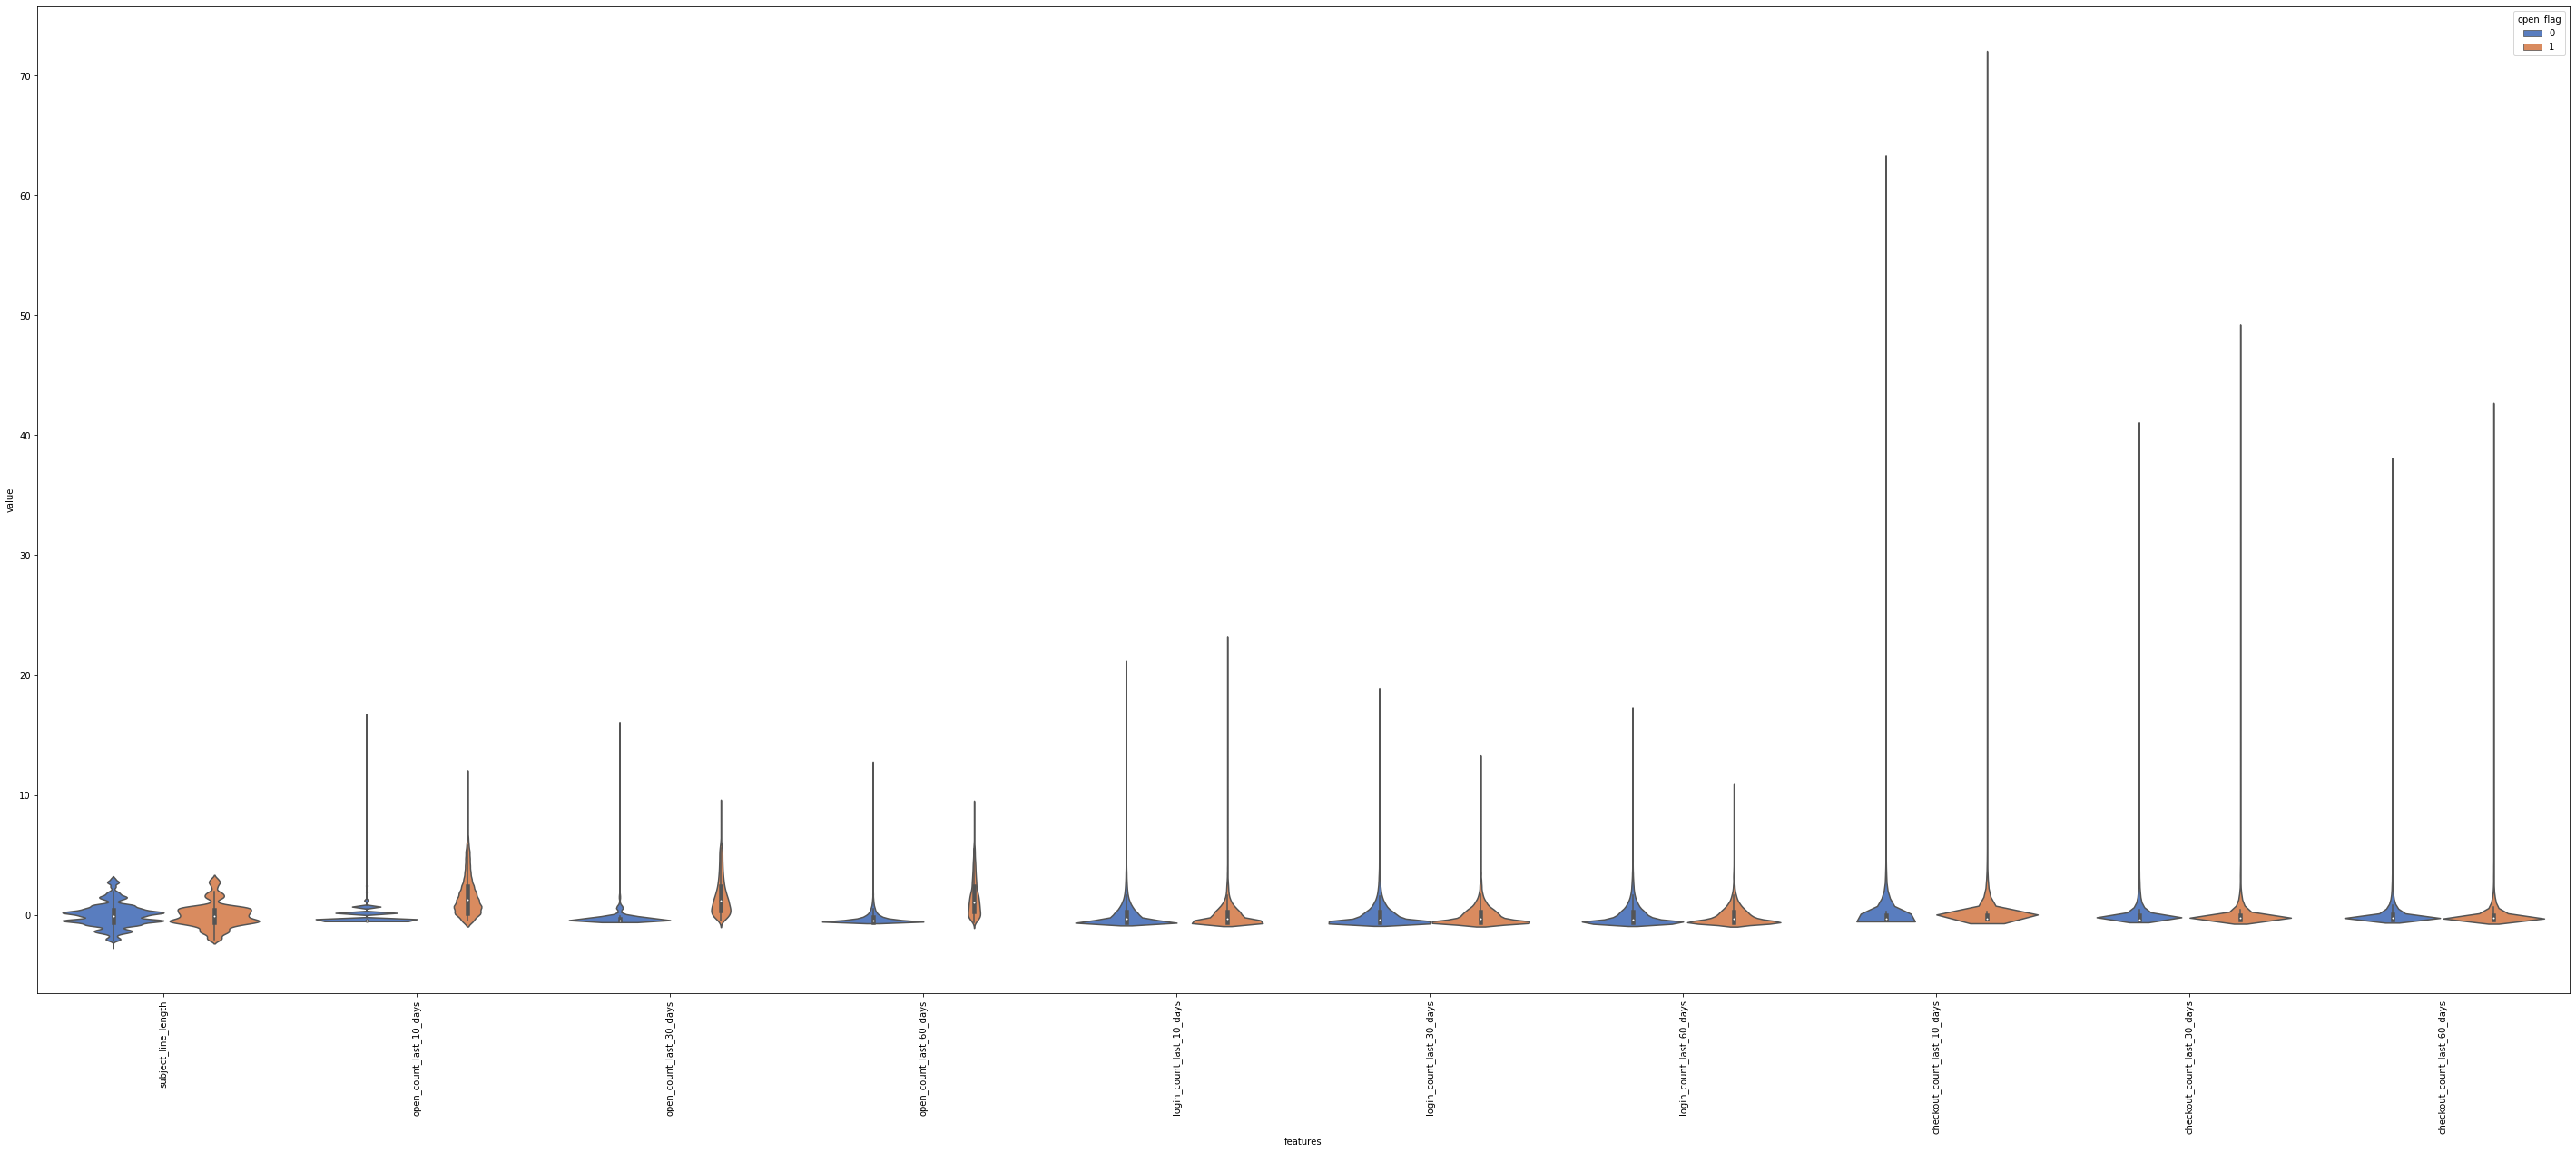

In [150]:
"""
可看到open_count_last_[10/30/60]_days這些變數分布變的較為瘦長

"""
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              
data = pd.concat([y,data_n_2.iloc[:,0:11]],axis=1)
data = pd.melt(data,id_vars="open_flag",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(50,20))
sns.violinplot(x="features", y="value", hue="open_flag", data=data,split=False, palette="muted",scale="area")
plt.xticks(rotation=90)

In [157]:
# 填答
df_test1 = pd.read_csv(r"C:\Users\user\Desktop\比賽\比賽8\test.csv")
df_test1 = df_test1.drop([col for col in df_test1.columns if col!='row_id'],axis=1)
df_test1['open_flag'] = 調整_test
df_test1.to_csv(r'C:\Users\user\Desktop\比賽\比賽8\ALL_balance_probadj_std_XGB_8168.csv',index=False)

# 結論 透過觀察樣本之分布有助於提升預測準確度